centrod after iteration- 1 centroid- [[19.0, 15.0], [49.83673469387755, 34.61224489795919], [35.39333333333333, 69.34]]
centrod after iteration- 2 centroid- [[19.0, 15.0], [49.83673469387755, 34.61224489795919], [35.39333333333333, 69.34]]
 
final centroids- [[19.0, 15.0], [49.83673469387755, 34.61224489795919], [35.39333333333333, 69.34]]


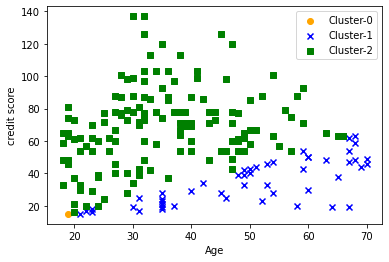

In [109]:
#Loading the required modules
from csv import reader
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

class style: BOLD = '\033[1m' ; END = '\033[0m';  WARNING = '\033[91m';

def insert_data(filename):
    dataset = list()
    with open(filename, 'r') as file:  
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset


#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)   #print(len(idx))
    centroids=[]
    for i in range(len(idx)):
        centroids.append(x[i])
    
   #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2     #print(distances)
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3  #print(points)
     
    for i in range(len(points)):
        x[i].append(points[i])  #print(x)
        
    #Repeating the above steps for a defined number of iterations
    #Step 4
    it=0
    for _ in range(no_of_iterations):
        it=it+1
        centroids = []
        for idx in range(k):
            idx=int(idx)
            #print("idx-",idx)

            #Updating Centroids by taking mean of Cluster it belongs to

            C=[k[:2] for k in x if k[-1]==idx]
            C=np.array(C)                       #print(idx, C)
            temp_cent=C.mean(axis=0)            #print(temp_cent)
            centroids.append(list(temp_cent))
            
        x=np.array(x) ; x1=x[:,0:2]        #print("centroids-",centroids)
        
        distances = cdist(x1, centroids ,'euclidean')
        print("centrod after iteration-",it, "centroid-", centroids)
        points = np.array([np.argmin(i) for i in distances])
    print(style.WARNING, style.BOLD)
    print("final centroids-",centroids)     
    return points 
 

#------------inserting data-------------
data = insert_data('bank.csv') 
arr = np.array(data[1:])

#---------filtering data-----------------
dataset=[]
for i in range (len(arr)):
    X1=int(arr[i][2])   #age
    X2=int(arr[i][3])   #s
    #Y=0 #initial centroid
    dataset.append([X1,X2])
    
   
#Applying our function
label = kmeans(dataset,3,2)
u_labels = np.unique(label) 
'''
for i in range(len(u_labels)):
    C=[k for k in dataset if k[-1]==i]
    print("centroid-",i)
    print(C) 
'''

for i in u_labels:
    x_p=[]
    y_p=[]
    color=['orange', 'b', 'g', 'y', 'r', 'cyan']
    mark= ['o', 'x', 's', 'H', '+', 'd']
    for t in range (len(dataset)):
        if dataset[t][-1] == i:
            x_p.append(dataset[t][0])
            y_p.append(dataset[t][1])
    dt=np.array(dataset)
    lab="Cluster-"+str(i)
    plt.scatter(x_p, y_p, c=color[i], marker=mark[i], label=lab)
    plt.legend(loc='upper right')
    plt.xlabel('Age')  # to plot A on X-axis
    plt.ylabel('credit score')   #to plot B on Y 